In [13]:
# Import necessary libraries
from google.colab import files
import zipfile
import os

# Upload ZIP file containing the dataset
uploaded = files.upload()

# Extract the ZIP file
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("crop_dataset")  # Extract to a folder
            print("Files extracted to 'crop_dataset'")



Saving archive.zip to archive (1).zip
Files extracted to 'crop_dataset'


In [22]:
import pandas as pd

# Get the CSV file name from the extracted folder
data_path = "crop_dataset"
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
csv_path = os.path.join(data_path, csv_files[0])

# Load the dataset using pandas
df = pd.read_csv(csv_path)

# Display first few rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
# Print basic info about the dataset
print("Dataset shape:", df.shape)

# Show column names
print("\nColumns:\n", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()



Dataset shape: (2200, 8)

Columns:
 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


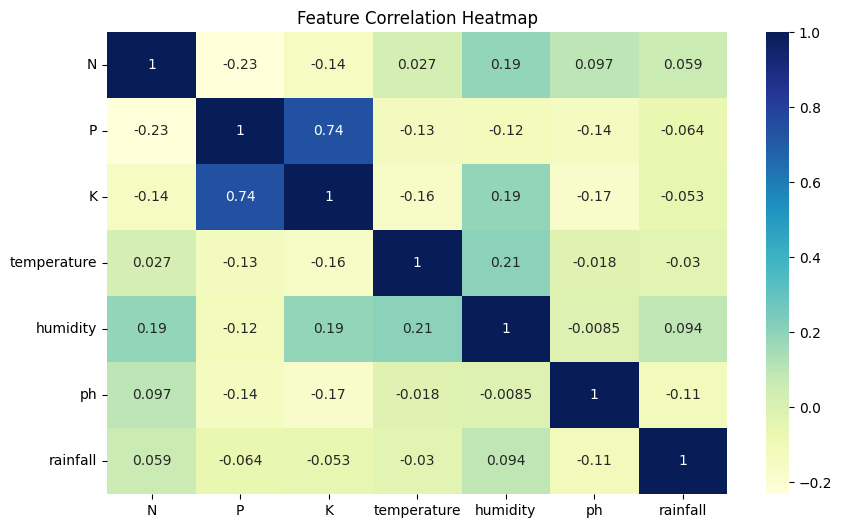

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric column (e.g., target variable 'label')
numeric_df = df.drop(columns=['label'])  # Replace 'label' if your target column has a different name

# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('label', axis=1)  # Features
y = df['label']               # Target (crop name)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy and performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.

In [19]:
# Predict best crop for a new input sample
# Format: [N, P, K, temperature, humidity, ph, rainfall]
sample = [[90, 42, 43, 20.5, 82.0, 6.5, 200.0]]

predicted_crop = model.predict(sample)
print("Recommended Crop:", predicted_crop[0])



Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
import joblib

# Save the model to a file
joblib.dump(model, 'crop_recommendation_model.pkl')
print("Model saved as 'crop_recommendation_model.pkl'")


Model saved as 'crop_recommendation_model.pkl'
